### Training data

Read slides and tumor masks from the [CAMELYON16](https://camelyon17.grand-challenge.org/Data/) dataset. It will install and use [OpenSlide](https://openslide.org/), the only non-Python dependency. Note that OpenSlide also includes a [DeepZoom viewer](https://github.com/openslide/openslide-python/tree/master/examples/deepzoom), shown in class. 

This [folder](https://drive.google.com/drive/folders/1rwWL8zU9v0M27BtQKI52bF6bVLW82RL5?usp=sharing) contains a few slides and tumor masks prepared in advance with ASAP. This amount of data (or less!) should be sufficient for your project. The goal is to build a thoughtful end-to-end prototype, not to match the accuracy from the [paper](https://arxiv.org/abs/1703.02442) discussed in class. If you would like more data than has been provided, you will need to use ASAP to convert it into an appropriate format. 


## GIT repo:
https://github.com/YihangDing/4995-Applied-Deep-Learning-project


## Preparation

* Dependency library installation
* Module import
* Google drive authentication


In [0]:
# Install the OpenSlide C library and Python bindings
!apt-get install openslide-tools
!pip install openslide-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 92.5 kB of archives.
After this operation, 268 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopenslide0 amd64 3.4.1+dfsg-2 [79.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 openslide-tools amd64 3.4.1+dfsg-2 [12.7 kB]
Fetched 92.5 kB in 0s (1,275 kB/s)
Selecting previously unselected package libopenslide0.
(Reading database ... 130811 files and directories currently installed.)
Preparing to unpack .../libopenslide0_3.4.1+dfsg

In [0]:
# Enable you to read files from your google drive.
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
# Now you can write files to google drive.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 9.1MB/s 


In [0]:
# Get google drive folder list.
# Will be used when upload files to google drive
folder_list = drive.ListFile({'q': "trashed=False"}).GetList()
for folder in folder_list:
    print('folder title: %s, id: %s' % (folder['title'], folder['id']))

folder title: COMS4995_project.ipynb, id: 1NGMT9oldN49Rc9X7objFRdY16j7bvf4j
folder title: 6889_project_model_mobileNet.ipynb, id: 1Ano8u92CuXRtqBNpdctV4qUAhiLTSrpb
folder title: 4995_model, id: 1x5qvLdZnPL25shSQERKWiY60zV1DBDIq
folder title: neg_labels_20_3.npy, id: 1JvKJXuaIq5uY7xfOOKvgW7OgcScFUeNU
folder title: neg_patches_20_3.npy, id: 1uX6SqqSQgF0BbWiYFt8hNn9SiOc7B2Aw
folder title: pos_labels_20_3.npy, id: 1m5rtEvDQo1-yO3zfQMHUPgIb1FZGNo9R
folder title: pos_patches_20_3.npy, id: 1PZ-UH93c8Fz7bh6X9bgMMAcF03Dwmbdc
folder title: neg_labels_19_3.npy, id: 1ZibhyjEB2FHuiRmDNiJdnv_ZFyAP7YO9
folder title: neg_patches_19_3.npy, id: 10oxGWVoph9P1HIJ4-SiIrW2grF6_LuZW
folder title: pos_labels_19_3.npy, id: 1pnpePfd6gXlO1JlcwdnXjFyKuQ6kNSzb
folder title: pos_patches_19_3.npy, id: 1GNSVO54XlVlIbvb3un6ZY7_sEXa1JTJq
folder title: neg_labels_18_3.npy, id: 1f4bnLAwkiP4WLmHCTI_QZdLr7Ry-8BzJ
folder title: neg_patches_18_3.npy, id: 1cSHPvgquRBMcQp39IDjGZ5wW-alQmSLp
folder title: pos_labels_18_3.npy, id

In [0]:
# find folder id from id list above
# LEVEL2_FOLDER_ID = "16aWDTP9m_NwQaarh3WXcpl20x_CnskdK"
# LEVEL4_FOLDER_ID = "11WM67AR9qWNiKs61psczNN1utEkKRJFb"
LEVEL3_FOLDER_ID = "1hnInkCUV0KQgELpJJU_QO9lORSKxI0Mb"
SLIDES_DIR = '/gdrive/My Drive/Colab Notebooks/slides/'
MODEL_FOLDER_ID = "1x5qvLdZnPL25shSQERKWiY60zV1DBDIq"

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from random import sample
from openslide import open_slide, __library_version__ as openslide_version
import os
from PIL import Image
from skimage.color import rgb2gray
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import shutil
import json
from datetime import datetime

import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## Get all available data

This part is about get list of all slides & discard incomplete data

In [0]:
# Get files in folder
files = os.listdir(SLIDES_DIR)
files[:2]

['tumor_091_mask.tif', 'tumor_091.tif']

In [0]:
# Get filenames for slides & masks and remove incomplete data
slide_paths, tumor_mask_paths = [], []
for item in files:
    if item[-4:] == '.tif':
        if item[-8:-4] == 'mask':
            tumor_mask_paths.append(item)
        else:
            slide_paths.append(item)
slide_paths = set(slide_paths)
# 038 has no mask, so discard it
slide_paths.discard("tumor_038.tif")
slide_paths = sorted(list(slide_paths))
tumor_mask_paths = sorted(tumor_mask_paths)
assert len(tumor_mask_paths) == len(slide_paths)
num_tif = len(slide_paths)
slide_index = [item[6:9] for item in slide_paths]
print("There are %d slide-mask pairs." % num_tif)

There are 21 slide-mask pairs.


In [0]:
# Check if the slides and masks are matched up.
for slide, mask in zip(slide_paths, tumor_mask_paths):
    print(slide, mask)

tumor_001.tif tumor_001_mask.tif
tumor_002.tif tumor_002_mask.tif
tumor_005.tif tumor_005_mask.tif
tumor_012.tif tumor_012_mask.tif
tumor_016.tif tumor_016_mask.tif
tumor_019.tif tumor_019_mask.tif
tumor_023.tif tumor_023_mask.tif
tumor_031.tif tumor_031_mask.tif
tumor_035.tif tumor_035_mask.tif
tumor_057.tif tumor_057_mask.tif
tumor_059.tif tumor_059_mask.tif
tumor_064.tif tumor_064_mask.tif
tumor_075.tif tumor_075_mask.tif
tumor_078.tif tumor_078_mask.tif
tumor_081.tif tumor_081_mask.tif
tumor_084.tif tumor_084_mask.tif
tumor_091.tif tumor_091_mask.tif
tumor_094.tif tumor_094_mask.tif
tumor_096.tif tumor_096_mask.tif
tumor_101.tif tumor_101_mask.tif
tumor_110.tif tumor_110_mask.tif


In [0]:
# Read a region from the slide
# Return a numpy RBG array
def read_slide(slide, x, y, level, width, height, as_float=False):
    im = slide.read_region((x, y), level, (width, height))
    im = im.convert('RGB')  # drop the alpha channel
    if as_float:
        im = np.asarray(im, dtype=np.float32)
    else:
        im = np.asarray(im)
    assert im.shape == (height, width, 3)
    return im


### Get info of all the slides (optional)
In this part, we try to display all slides' info, such as size & general shape, to have a better understanding of data

In [0]:
# get level info of all slides and size of level 0
for i, item in enumerate(slide_paths):
    real_path = SLIDES_DIR + item
    slide = open_slide(real_path)
    print("Slide no. %s with %d levels, width: %d, height: %d" % (
        slide_index[i], len(slide.level_dimensions),
        slide.level_dimensions[0][0], slide.level_dimensions[0][1]))

Slide no. 001 with 10 levels, width: 97792, height: 221184
Slide no. 002 with 10 levels, width: 97792, height: 219648
Slide no. 005 with 10 levels, width: 97792, height: 219648
Slide no. 012 with 10 levels, width: 97792, height: 215552
Slide no. 016 with 10 levels, width: 97792, height: 221184
Slide no. 019 with 10 levels, width: 97792, height: 219648
Slide no. 023 with 10 levels, width: 97792, height: 221184
Slide no. 031 with 10 levels, width: 97792, height: 221184
Slide no. 035 with 10 levels, width: 97792, height: 221184
Slide no. 057 with 10 levels, width: 97792, height: 220672
Slide no. 059 with 10 levels, width: 97280, height: 221184
Slide no. 064 with 10 levels, width: 97792, height: 220672
Slide no. 075 with 9 levels, width: 90112, height: 78848
Slide no. 078 with 9 levels, width: 94208, height: 111104
Slide no. 081 with 9 levels, width: 90112, height: 100352
Slide no. 084 with 9 levels, width: 65536, height: 86016
Slide no. 091 with 8 levels, width: 61440, height: 53760
Slide

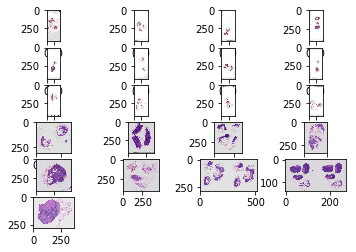

In [0]:
# show imgs at highest level (with smallest size) to see general shape
ncol = 4
for i in range(num_tif):
    real_path = SLIDES_DIR + slide_paths[i]
    slide = open_slide(real_path)
    plt.subplot(np.ceil(num_tif / ncol), ncol, i + 1)
    level = len(slide.level_dimensions) - 1
    slide_image = read_slide(slide,
                             x=0,
                             y=0,
                             level=level,
                             width=slide.level_dimensions[level][0],
                             height=slide.level_dimensions[level][1])
    plt.imshow(slide_image)
plt.show()

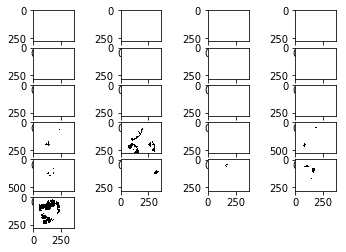

In [0]:
# show masks at highest level to see general shape
for i in range(num_tif):
    real_path = SLIDES_DIR + tumor_mask_paths[i]
    mask = open_slide(real_path)
    plt.subplot(np.ceil(num_tif / ncol), ncol, i + 1)
    level = len(mask.level_dimensions) - 1
    mask_image = read_slide(mask,
                            x=0,
                            y=0,
                            level=level,
                            width=slide.level_dimensions[level][0],
                            height=slide.level_dimensions[level][1])
    mask_image = mask_image[:, :, 1]
    plt.imshow(mask_image, cmap=plt.cm.binary)
plt.show()

(2240, 2944, 3)


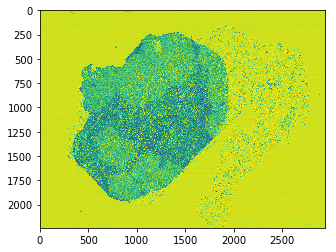

In [0]:
# experiment code block for displaying some img quickly
index = 20  # < num_tif
level = 5  # < len(mask.level_dimensions)-1
real_path = SLIDES_DIR + slide_paths[index]
mask = open_slide(real_path)
mask_image = read_slide(mask,
                        x=0,
                        y=0,
                        level=level,
                        width=slide.level_dimensions[level][0],
                        height=slide.level_dimensions[level][1])
print(mask_image.shape)
mask_image = mask_image[:, :, 0]
plt.imshow(mask_image)
plt.show()

## Patch from tif and save on VM disk and google drive
For the first time: **MUST RUN**

If you've already run these chunks of code, this part is **optional**, as patches are already saved in gdrive, and you can read data from google drive directly.

The default level of the slides to get patch from is set to be **3**, can be changed by **level2patch** param in the block below.

In [0]:
# Improve efficiency by ignoring non-tissue areas 
# of the slide. We'll find these by looking for all gray regions.
# Mainly used to calculate the percentage of tissue area.
def find_tissue_pixels(image, intensity=0.8):
    im_gray = rgb2gray(image)
    assert im_gray.shape == (image.shape[0], image.shape[1])
    indices = np.where(im_gray <= intensity)
    return list(zip(indices[0], indices[1]))

In [0]:
# Use a sliding window to extract patches those are tissue areas from a 
# designated level, default 0.15
# set threshold to be 0.1 for judging if the patch is pos or neg.
# i. e. if sum of mask is smaller than pos_label_intensity, then less than 10% 
# of the label has tumor, label it as negative sample
# Since too many neg samples has no good for training, we get neg samples no 
# more than neg_threshold randomly for each tif.


def generate_data(slide, tumor_mask, level, stride, size,
                  neg_threshold=20, label_threshold=0.1,
                  tissue_threshold=0.15):
    # compute patch size
    pos_patch, pos_label, neg_patch, neg_label = [], [], [], []

    patch_size = (slide.level_dimensions[level][0] // stride,
                  slide.level_dimensions[level][1] // stride)
    neg_count = pos_count = 0
    # for tumor, mask[i][j]=1
    pos_label_intensity = label_threshold * size ** 2
    for col in range(patch_size[0]):
        for row in range(patch_size[1]):
            # get patch
            patch = read_slide(slide,
                               x=col * 2 ** level * stride,
                               y=row * 2 ** level * stride,
                               level=level,
                               width=size,
                               height=size)
            # calculate intensity
            tissue_pixels = find_tissue_pixels(patch)
            percent_tissue = len(tissue_pixels) / \
                (patch.shape[0] * patch.shape[1])
            if percent_tissue > tissue_threshold:
                # decide if is pos or neg using corresponding mask
                # get mask
                mask = read_slide(tumor_mask,
                                  x=col * 2 ** level * stride,
                                  y=row * 2 ** level * stride,
                                  level=level,
                                  width=size,
                                  height=size)
                mask = np.expand_dims(np.array(mask[:, :, 0]), axis=-1)
                patch = np.expand_dims(np.array(patch[:, :, 0]), axis=-1)

                # save pos sample
                if np.sum(mask) > pos_label_intensity:
                    pos_count += 1
                    pos_patch.append(patch)
                    pos_label.append(mask)

                # save neg sample
                else:
                    neg_count += 1
                    neg_patch.append(patch)
                    neg_label.append(mask)
    
    neg_count = min(neg_threshold, neg_count)
    neg_pairs = list(zip(neg_patch, neg_label))  
    neg_pairs = sample(neg_pairs, neg_threshold)
    neg_patch, neg_label = zip(*neg_pairs)
    
    print('\nNum Pos: %d, Num Neg: %d' % (pos_count, neg_count))
    return [items and np.stack(items, axis=0) for items in [pos_patch, pos_label, neg_patch, neg_label]]


In [0]:
# save patches to VM disk in .npy format, then save to Google Drive
def save(nparray, target_dir, part, index, level, folder_id):
    fname = part + "_" + str(index) + "_" + str(level) + ".npy"
    path = os.path.join(target_dir, fname)
    np.save(open(path, "wb"), nparray)
    file_metadata = {'title': fname,
                     "parents": [{"id": folder_id, "kind": "drive#childList"}]}
    folder = drive.CreateFile(file_metadata)
    folder.SetContentFile(path)
    folder.Upload()

In [0]:
# Create a folder to store .npy files on VM disk
# Use level 3 in our task
level2patch = 3
path = os.path.join("/content", "level_" + str(level2patch))
if not os.path.exists(path):
    os.mkdir(path)

In [0]:
# Extract patches from all avaliable tif img 
stride = 256
size = 256
folder_id = LEVEL3_FOLDER_ID

start = 0  # if the code break down, you can change this param to the break point to continue
for i in tqdm(range(start, num_tif)):
    slide_path = SLIDES_DIR + slide_paths[i]
    slide = open_slide(slide_path)
    tumor_mask_path = SLIDES_DIR + tumor_mask_paths[i]
    tumor_mask = open_slide(tumor_mask_path)
    # generate data
    pos_patches, pos_labels, neg_patches, neg_labels = generate_data(
        slide, tumor_mask, level2patch, stride, size)
    if not isinstance(pos_patches, list):
        save(pos_patches, path, "pos_patches", i, level2patch, folder_id)
        save(pos_labels, path, "pos_labels", i, level2patch, folder_id)
        save(neg_patches, path, "neg_patches", i, level2patch, folder_id)
        save(neg_labels, path, "neg_labels", i, level2patch, folder_id)
        print("\ntif %d saved" % i)

  0%|          | 0/21 [00:00<?, ?it/s]


Num Pos: 7, Num Neg: 20


  5%|▍         | 1/21 [00:45<15:05, 45.30s/it]


tif 0 saved

Num Pos: 1, Num Neg: 20


 10%|▉         | 2/21 [01:23<13:41, 43.22s/it]


tif 1 saved

Num Pos: 2, Num Neg: 20


 14%|█▍        | 3/21 [02:03<12:39, 42.22s/it]


tif 2 saved

Num Pos: 1, Num Neg: 20


 19%|█▉        | 4/21 [02:42<11:43, 41.36s/it]


tif 3 saved

Num Pos: 55, Num Neg: 20


 24%|██▍       | 5/21 [03:24<11:05, 41.57s/it]


tif 4 saved

Num Pos: 4, Num Neg: 20


 29%|██▊       | 6/21 [04:02<10:05, 40.38s/it]


tif 5 saved

Num Pos: 2, Num Neg: 20


 33%|███▎      | 7/21 [04:42<09:23, 40.28s/it]


tif 6 saved

Num Pos: 66, Num Neg: 20


 38%|███▊      | 8/21 [05:20<08:35, 39.67s/it]


tif 7 saved


 43%|████▎     | 9/21 [05:54<07:35, 37.96s/it]


Num Pos: 0, Num Neg: 20


 48%|████▊     | 10/21 [06:30<06:48, 37.17s/it]


Num Pos: 0, Num Neg: 20


 52%|█████▏    | 11/21 [07:04<06:03, 36.38s/it]


Num Pos: 0, Num Neg: 20

Num Pos: 55, Num Neg: 20


 57%|█████▋    | 12/21 [07:45<05:40, 37.80s/it]


tif 11 saved

Num Pos: 26, Num Neg: 20


 62%|██████▏   | 13/21 [08:06<04:21, 32.75s/it]


tif 12 saved

Num Pos: 342, Num Neg: 20


 67%|██████▋   | 14/21 [08:42<03:55, 33.62s/it]


tif 13 saved

Num Pos: 1, Num Neg: 20


 71%|███████▏  | 15/21 [09:08<03:08, 31.40s/it]


tif 14 saved

Num Pos: 13, Num Neg: 20


 76%|███████▌  | 16/21 [09:26<02:17, 27.44s/it]


tif 15 saved

Num Pos: 21, Num Neg: 20


 81%|████████  | 17/21 [09:41<01:34, 23.66s/it]


tif 16 saved

Num Pos: 22, Num Neg: 20


 86%|████████▌ | 18/21 [10:13<01:18, 26.07s/it]


tif 17 saved

Num Pos: 17, Num Neg: 20


 90%|█████████ | 19/21 [10:40<00:52, 26.49s/it]


tif 18 saved

Num Pos: 72, Num Neg: 20


 95%|█████████▌| 20/21 [11:10<00:27, 27.45s/it]


tif 19 saved

Num Pos: 318, Num Neg: 20


100%|██████████| 21/21 [11:35<00:00, 26.82s/it]


tif 20 saved


## Read data from google drive

In [0]:
# Set the corresponding folder name in Google Drive: format: level + num_of_level
# PREPROCESSED_DIR = "/gdrive/My Drive/Colab Notebooks/preprocessed_data/level"
PREPROCESSED_DIR = "/gdrive/My Drive/Colab Notebooks/level"
level2read = 3
data_dir = PREPROCESSED_DIR + str(level2read)

In [0]:
data_fnames = os.listdir(data_dir)
data_fnames[:6]

['pos_patches_0_3.npy',
 'pos_labels_0_3.npy',
 'neg_patches_0_3.npy',
 'neg_labels_0_3.npy',
 'pos_patches_1_3.npy',
 'pos_labels_1_3.npy']

In [0]:
# Read .npy file (1 for each tif file) from Google Drive, then concatenate to 
# get train pos & neg data
pos_patches, pos_labels, neg_patches, neg_labels = [], [], [], []
for fname in tqdm(sorted(data_fnames)):
    # exclude 17th tif as test img
    if "17" in fname:
        continue
    array = np.load(open(os.path.join(data_dir, fname), 'rb'))
    if "pos_patches" in fname:
        pos_patches.append(array)
    elif "pos_labels" in fname:
        pos_labels.append(array)
    elif "neg_patches" in fname:
        neg_patches.append(array)
    elif "neg_labels" in fname:
        neg_labels.append(array)
    else:
        raise ExceptionError

x_pos = np.concatenate(pos_patches, axis=0)
y_pos = np.concatenate(pos_labels, axis=0)
x_neg = np.concatenate(neg_patches, axis=0)
y_neg = np.concatenate(neg_labels, axis=0)

assert x_pos.shape[0] == y_pos.shape[0]
assert x_neg.shape[0] == y_neg.shape[0]

x_pos.shape, y_pos.shape, x_neg.shape, y_neg.shape

100%|██████████| 72/72 [00:33<00:00,  1.15it/s]


((1003, 256, 256, 1),
 (1003, 256, 256, 1),
 (340, 256, 256, 1),
 (340, 256, 256, 1))

In [0]:
# compare the img & mask & prediction.
# or display img only.
# offset: offset for img index that want to be displayed, default: 0
# nrow: number of images to be shown
# img, mask, pred are of shape (n, width, height, channels)
def show_image(img, mask=None, pred=None, nrow=5, offset=0):
    print('Sequence: Img, Mask, Prediction')
    plt.figure(figsize=(7, 7))
    ncol = 1 + (mask is not None) + (pred is not None)
    for i in range(nrow):
        plt.subplot(nrow, ncol, ncol * i + 1)
        plt.axis("off")
        plt.imshow(np.squeeze(img[i + offset]), cmap=plt.cm.binary)
        
        if mask is not None:
            plt.subplot(nrow, ncol, ncol * i + 2)
            plt.axis("off")
            # np.squeeze: Remove single-dimensional entries from the shape of an array to display img
            plt.imshow(np.squeeze(mask[i + offset]), cmap=plt.cm.binary)  
            
        if pred is not None:
            plt.subplot(nrow, ncol, ncol * i + 3)
            plt.axis("off")
            plt.imshow(np.squeeze(pred[i + offset]), cmap=plt.cm.binary)   

Sequence: Img, Mask, Prediction


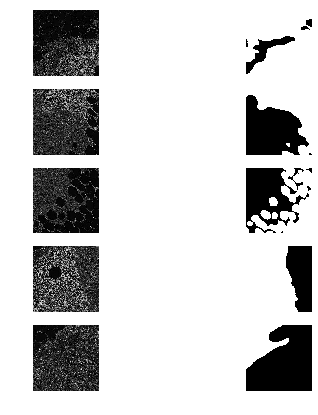

In [0]:
# show some patches & corrsponding labels (no pred here)
show_image(x_pos, y_pos, nrow=5, offset=40)

## Train the U-net model

In [0]:
# Whether to include neg data in training data, if not, set with_neg = False
with_neg = False

# normalize input data
if with_neg:   
    x = np.concatenate([x_pos, x_neg], axis=0) / 255.0
    y = np.concatenate([y_pos, y_neg], axis=0)
else:
    x = x_pos / 255.0
    y = y_pos
    
x.shape, y.shape

((1003, 256, 256, 1), (1003, 256, 256, 1))

In [0]:
# Split train test data with fraction 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((802, 256, 256, 1),
 (201, 256, 256, 1),
 (802, 256, 256, 1),
 (201, 256, 256, 1))

In [0]:
# Do data augmentation (NOT necessary, original data is sufficient for this task)
data_gen_args = dict(rotation_range=0.2,
                     width_shift_range=0.05,
                     height_shift_range=0.05,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')

train_data_gen = ImageDataGenerator(**data_gen_args).flow(x_train, y_train, 16)

In [0]:
# define Unet model
# upsample method: Upsampling2D
# ----------------------------------------------------------------------------------------------------------------------------------
# NOTE: In our test, Deconvolution outperforms Upsampling2D in case of upsampling method, so use the model BELOW instead of this one
# ----------------------------------------------------------------------------------------------------------------------------------
def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    model.summary()
    
    # if want to use pretrained weights:
    # Use weights from gdrive folder '/Colab Notebooks/4995_model' (saved weights have name begin with 'weights_')
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model
  
model = unet(input_size=(256, 256, 1))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 256, 256, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_25[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_26[0][0]                  
__________________________________________________________________________________________________
conv2d_27 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [0]:
# define Unet model
# Upsample Method: Deconv instead of upsampling2d
def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(Conv2DTranspose(512, kernel_size = (4,4), strides = (2,2), padding = 'same', kernel_initializer = 'he_normal')(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(Conv2DTranspose(256, kernel_size = (4,4), strides = (2,2), padding = 'same', kernel_initializer = 'he_normal')(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(Conv2DTranspose(128, kernel_size = (4,4), strides = (2,2), padding = 'same', kernel_initializer = 'he_normal')(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(Conv2DTranspose(64, kernel_size = (4,4), strides = (2,2), padding = 'same', kernel_initializer = 'he_normal')(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    model.summary()
    
    # if want to use pretrained weights:
    # Use weights from gdrive folder '/Colab Notebooks/4995_model' (saved weights have name begin with 'weights_')
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model
  
model = unet(input_size=(256, 256, 1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxP

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [0]:
# Load saved weights to model
# --------------------------------------------------------------------------
# NOTE: if want to train a model, DO NOT run this block
# --------------------------------------------------------------------------
saved_weights_dir = '/gdrive/My Drive/Colab Notebooks/4995_model/weights_2019-05-12 00:08.h5'
model.load_weights(saved_weights_dir)

In [0]:
# Train model
# Batch size = 16
# --------------------------------------------------------------------------
# NOTE: if data augmentation is used, use fit_generator() instead of fit()
# --------------------------------------------------------------------------
history = model.fit(x_train, y_train, 16, 10, validation_data=(x_test, y_test))
# histoty = model.fit_generator(train_data_gen, 200, 5, validation_data=(x_test, y_test))

Train on 802 samples, validate on 201 samples
Epoch 1/10
802/802 [==============================] - 58s 72ms/step - loss: 0.2526 - acc: 0.8989 - val_loss: 0.2745 - val_acc: 0.8901
Epoch 2/10
802/802 [==============================] - 57s 71ms/step - loss: 0.2524 - acc: 0.8986 - val_loss: 0.3201 - val_acc: 0.8644
Epoch 3/10
802/802 [==============================] - 57s 72ms/step - loss: 0.2400 - acc: 0.9040 - val_loss: 0.2496 - val_acc: 0.8957
Epoch 4/10
802/802 [==============================] - 57s 71ms/step - loss: 0.2602 - acc: 0.8949 - val_loss: 0.2547 - val_acc: 0.8955
Epoch 5/10
802/802 [==============================] - 57s 71ms/step - loss: 0.2390 - acc: 0.9043 - val_loss: 0.2537 - val_acc: 0.9021
Epoch 6/10
802/802 [==============================] - 57s 71ms/step - loss: 0.2464 - acc: 0.9040 - val_loss: 0.2483 - val_acc: 0.9027
Epoch 7/10
802/802 [==============================] - 57s 71ms/step - loss: 0.2390 - acc: 0.9067 - val_loss: 0.2448 - val_acc: 0.9022
Epoch 8/10
802/8

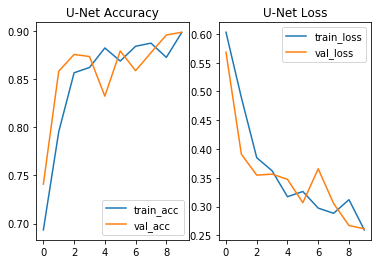

In [0]:
# plot acc & loss
def train_plot(history):
    #plot acc
    train_acc=history.history['acc']
    val_acc=history.history['val_acc']
    plt.subplot(1,2,1)
    plt.plot(train_acc,label="train_acc")
    plt.plot(val_acc,label="val_acc")
    plt.legend()
    plt.title('U-Net Accuracy')

    #plot loss
    train_loss=history.history['loss']
    val_loss=history.history['val_loss']
    plt.subplot(1,2,2)
    plt.plot(train_loss,label="train_loss")
    plt.plot(val_loss,label="val_loss")
    plt.legend()
    plt.title('U-Net Loss')
    plt.show()
train_plot(history)

In [0]:
# save model to gdrive
def save_model(model, MODEL_FOLDER_ID):
    try:
        # save model & weights locally
        local_name = str(datetime.now())[:-10]+'.h5'
        model.save(local_name)
        local_name_weights = 'weights_' + local_name
        model.save_weights(local_name_weights)
        # upload to gdrive
        upload_to_folder(MODEL_FOLDER_ID, local_name, local_name)
        upload_to_folder(MODEL_FOLDER_ID, local_name_weights, local_name_weights)
        print('model & weights saved to Google Drive with name:',local_name, local_name_weights)
    except Exception as esc:
        print(esc)

In [0]:
# upload item to gdrive folder with specified folder_id
def upload_to_folder(folder_id, file_name_local, file_name_in_folder):
    file_metadata = {'title': file_name_in_folder, "parents": [{"id": folder_id, "kind": "drive#childList"}]}
    folder = drive.CreateFile(file_metadata)
    folder.SetContentFile(file_name_local) #The contents of the file
    folder.Upload()

In [0]:
# save model
save_model(model, MODEL_FOLDER_ID)

model & weights saved to Google Drive with name: 2019-05-12 00:08.h5 weights_2019-05-12 00:08.h5


In [0]:
# Predict patches, return binary imgs
def predict(model, x_test):
    pred = model.predict(x_test)
    pred = np.where(pred > 0.5, 1, 0)
    return pred

In [0]:
pred = predict(model, x_test)

Sequence: Img, Mask, Prediction


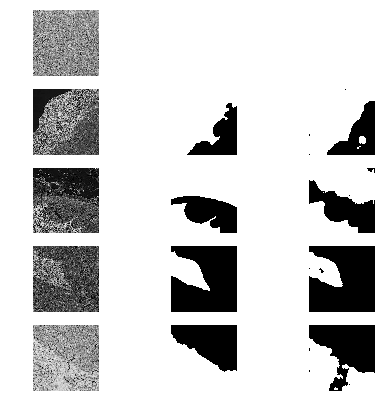

In [0]:
show_image(x_test, y_test, pred, offset=125)

Sequence: Img, Mask, Prediction


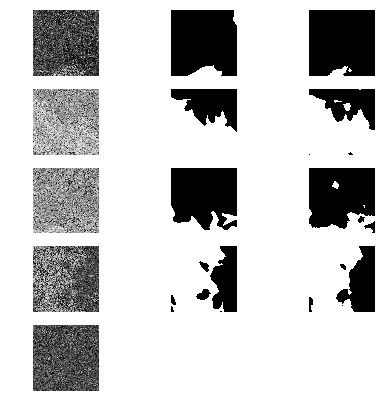

In [0]:
# more prediction results
show_image(x_test, y_test, pred, offset=33)

Sequence: Img, Mask, Prediction


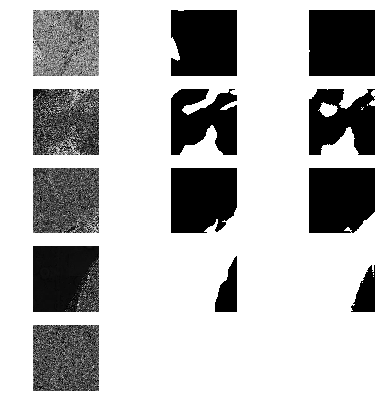

In [0]:
# more prediction results
show_image(x_test, y_test, pred, offset=60)

In [0]:
# Only predict neg data to see the result
neg_pred = predict(model, x_neg)

Sequence: Img, Mask, Prediction


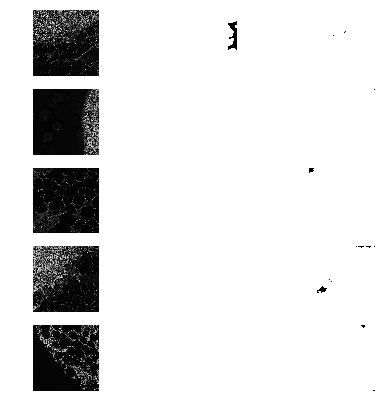

In [0]:
show_image(x_neg, y_neg, neg_pred, offset=25)

In [0]:
# Predict on the whole img, by cut a patch, predict, then concatenate to form the 
# img with same size as input img
def predict_on_whole(model, slide, level, stride, size, tissue_threshold=0.15):
    patch_size = (slide.level_dimensions[level][0] // stride,
                  slide.level_dimensions[level][1] // stride)

    preds = []
    for col in range(patch_size[0]):
        col_preds = []
        for row in range(patch_size[1]):
            # get patch
            patch = read_slide(slide,
                               x=col * 2 ** level * stride,
                               y=row * 2 ** level * stride,
                               level=level,
                               width=size,
                               height=size)

            patch = np.expand_dims(np.array(patch[:, :, 0]), axis=-1)
            pred = predict(model, np.expand_dims(patch, axis=0))
            col_preds.append(np.squeeze(pred))
        # First concatenate to form a column
        col_preds = np.concatenate(col_preds, axis=0)
        preds.append(col_preds)
    # Then concatenate all columns to form the whole img
    return np.concatenate(preds, axis=1)

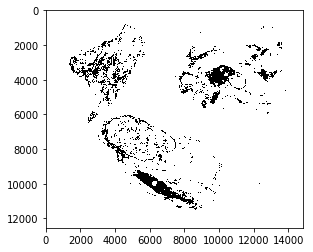

In [0]:
# Test the whole img on 17th img
level2test = 3
test_label = SLIDES_DIR + tumor_mask_paths[17]
test_label = open_slide(test_label)
test_slide = SLIDES_DIR + slide_paths[17]
test_slide = open_slide(test_slide)

test_pred = predict_on_whole(model, test_slide, level2test, 256, 256)
# Show the predicted img
plt.imshow(test_pred, cmap=plt.cm.binary)

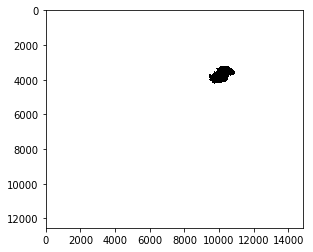

In [0]:
# Show the original label
test_label = SLIDES_DIR + tumor_mask_paths[17]
test_label = open_slide(test_label)
test_mask = read_slide(test_label,
                         x=0,
                         y=0,
                         level=level2test,
                         width=test_label.level_dimensions[level2test][0],
                         height=test_label.level_dimensions[level2test][1])
plt.imshow(test_mask[:, :, 0], cmap=plt.cm.binary)